# Customer Segmentation- Unsupervised Machine Learning

## Problem Statement

Nexux is a bank that has conducted campaigns with the goal of acquiring deposits. The current situation at the bank is not encouraging in that customers don't really subscribe to term deposit and they also default. As a data scientist, the goal of this project is to determine how the customer demographics such as age, educational level e.t.c influences customers attitude toward defaulting and also predict the lkelihood of customers subscribing to term deposit by using Machine learning models in order to improve future marketing campaigns for the bank. The following steps will be taken to achieve the goal of this project:

- Exploratory data analysis
- Feature engineering
- Modelling - KMeans clustering will be used to do the Customer segmentation and 8 models will be evaluated for the classification task. Training and test data will be split into 70:30.
- Model Evaluation - Each of the 8 models will be compared and evaluated.

This will help the management of Nexux bank to modify its product based on its target customers from different types of customer segments. For example, instead of spending money on marketing to every customer in the bank’s database, they can analyze which customer segment is most likely to subscribe to term deposit and then market the product only to that particular segment. In short, for marketing campaigns to be effective, the bank will know the right customers to target at the right time with the right messages or contents that will lead to large conversion. 

In [1]:
# Import libraries

# Data Analysis libaries
import pandas as pd
import numpy as np

# Data visualization libaries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Machine learning and Evaluation for customer segmentation
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, homogeneity_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load data
df = pd.read_csv(r"C:\Users\EZ FARMING\Desktop\Seun Personal Docs\DATA SCIENCE\MACHINE LEARNING\CAPSTONE PROJECT\bank.csv")
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome deposit  
0  unknown    5   may       261         1     -1         0  unknown      no  
1  unknown    5   may       151         1     -1         0  unknown      no  
2  unknown    5   may        76         1     -1         0  unknown      no  
3  unknown    5   may        92         1     -1         0  unknown      no  
4  unknown    5   may       198         1     -1         0  unknown      no

In [3]:
#Data dimensionality
df.shape

(45211, 17)

In [4]:
#Checking for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


There is no missing data

In [5]:
#Numerical statistical Analysis
df.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [6]:
# Count the number of rows with -1 as the 'pdays' value
count_negative_pdays = (df['pdays'] == -1).sum()
# Print the count
print("Number of rows with -1 as the 'pdays' value:", count_negative_pdays)

Number of rows with -1 as the 'pdays' value: 36954


In [7]:
# Categorical Statistical Analysis
df.describe(include=['object', 'bool'])

job  marital  education default housing   loan   contact  \
count         45211    45211      45211   45211   45211  45211     45211   
unique           12        3          4       2       2      2         3   
top     blue-collar  married  secondary      no     yes     no  cellular   
freq           9732    27214      23202   44396   25130  37967     29285   

        month poutcome deposit  
count   45211    45211   45211  
unique     12        4       2  
top       may  unknown      no  
freq    13766    36959   39922

In [8]:
# Investigate the missing data
null_vals= df.isnull().sum()
null_vals

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

Data Cleaning and Pre-Processing

In [9]:
# Check for duplicates
df.duplicated().sum()

0

In [10]:
# Print unique values in each column

for i in df.columns.tolist():
    print(i, '\n\n', df[i].unique())
    print('\n ------------------------------------------------------------------------------------------------------')

age 

 [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]

 ------------------------------------------------------------------------------------------------------
job 

 ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

 ------------------------------------------------------------------------------------------------------
marital 

 ['married' 'single' 'divorced']

 ------------------------------------------------------------------------------------------------------
education 

 ['tertiary' 'secondary' 'unknown' 'primary']

 ------------------------------------------------------------------------------------------------------
default 

 ['no' 'yes']

 -----------------------------------------------------

## Exploratory Data Analysis

### Univariate Analysis

#### Job

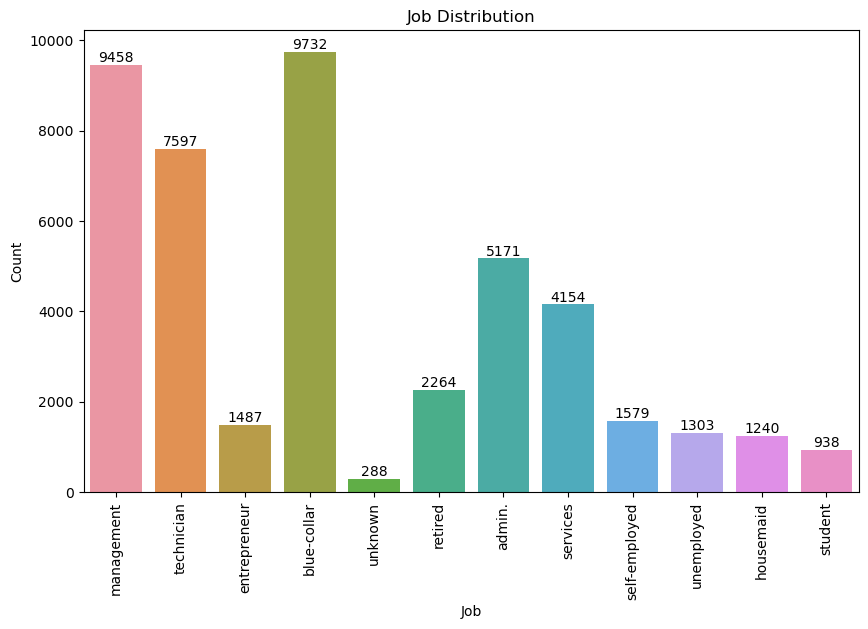

In [11]:
# Job Distribution
job_counts = df["job"].value_counts()

# Bar Plot for Job Distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="job", data=df)
plt.xlabel("Job")
plt.ylabel("Count")
plt.title("Job Distribution")
plt.xticks(rotation=90)

# Label the bars with count values
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

plt.show()

It is seen from the above summary that most of the customers are doing blue-collar job followed by management and technician jobs.

#### Marital Status

In [12]:
fig = px.bar(
    df["marital"].value_counts(normalize=True),
    title = "Proportion of Customer's Marital Status",
    height=500
)
fig.update_layout(yaxis_title = "Frequency [proportion]")
fig.show()

It is seen from the above summary that about 60% of customers are married while 28% are single and the remaining close to 11%  are divorced.

#### Education

In [13]:
fig = px.bar(
    df["education"].value_counts(normalize=True),
    title = "Frequency of Customer's Education [proportion]",
    height=500
)
fig.update_layout(yaxis_title = "Frequency [proportion]")
fig.show()


It is seen from the above summary that most of our customer's highest education level is secondary. About 51% of customers have their education at secondary level which is then followed by customers with tertiary level of education, then primary. The education level of the remaining 4% is unknown.

#### Loan or Credit Card Payment Default

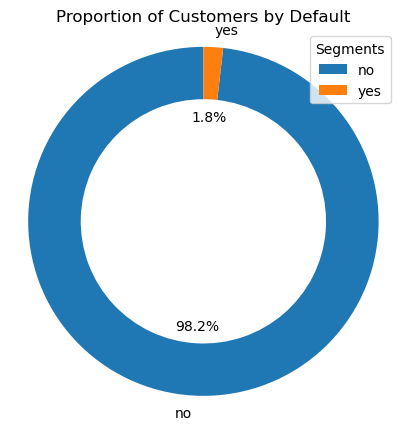

In [14]:
# Calculate the values for the pie chart
segment_counts = df['default'].value_counts()
segment_labels = segment_counts.index
segment_values = segment_counts.values

# Create the donut pie chart
plt.figure(figsize=(5, 5))
plt.pie(segment_values, labels=segment_labels, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
plt.axis('equal')
plt.title('Proportion of Customers by Default')
plt.legend(title='Segments', loc='upper right')
plt.show()

As shown above, just 1.8% of the customers defaulted while about 98.2% did not.
Defualt feature seems not to play an important role since almost all the customers do not default.

#### Current Balance in Customers' Account

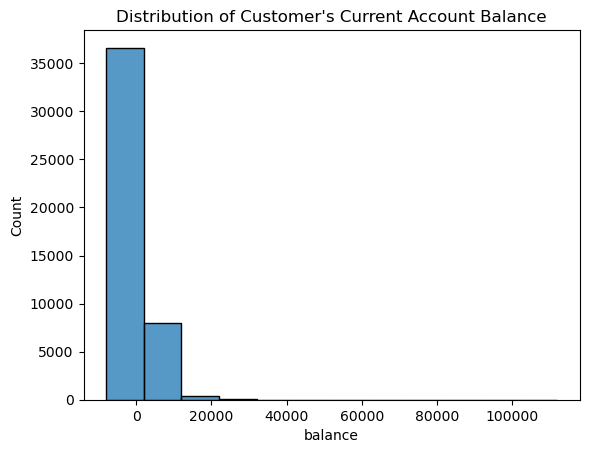

In [15]:
sns.histplot(data=df, x="balance", binwidth=1e4)
plt.title("Distribution of Customer's Current Account Balance");

It is seen that majority of customer's income is within -8-20k$. 

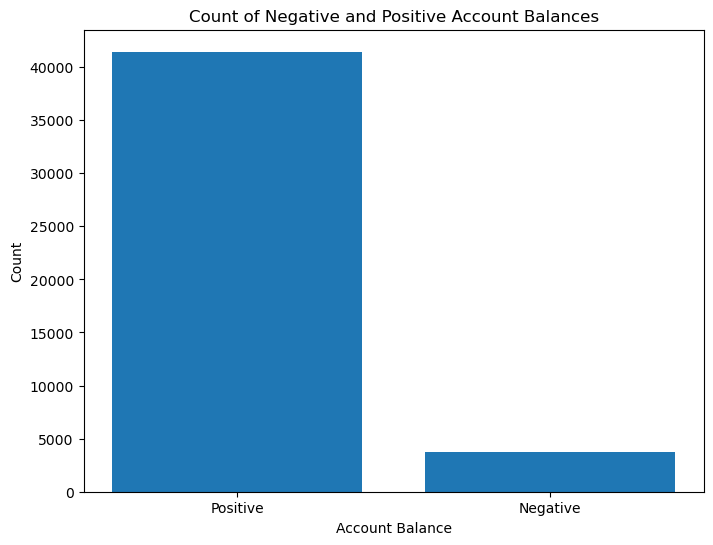

In [16]:
# Count the number of negative and positive account balances
balance_counts = df['balance'].apply(lambda x: 'Negative' if x < 0 else 'Positive').value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(balance_counts.index, balance_counts.values)
plt.xlabel('Account Balance')
plt.ylabel('Count')
plt.title('Count of Negative and Positive Account Balances')
plt.show()

There are more customers with positive account balance.

#### Housing Loan

In [17]:
fig = px.bar(
    df["housing"].value_counts(normalize=True),
    title = "Proportion of Customers by Housing Loan Status",
    height=500
)
fig.update_layout(yaxis_title = "Frequency")
fig.show()

56% of the customers have housing loan while the remaining 44% do not have.

#### Personal Loan

In [18]:
fig = px.bar(
    df["loan"].value_counts(normalize=True),
    title = "Proportion of Customers by Personal Loan Status",
    height=500
)
fig.update_layout(yaxis_title = "Frequency")
fig.show()

16% of the customers collected personal loan while the remaining 84% do not.

#### Contact Method

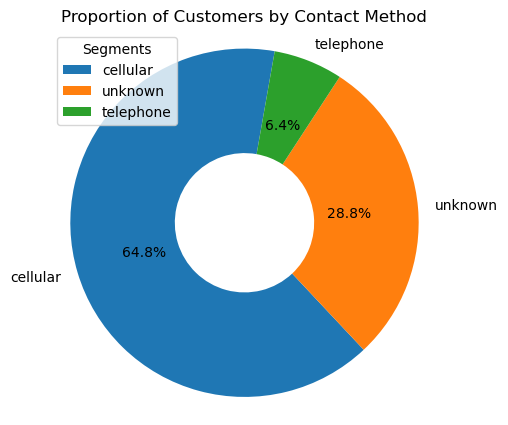

In [19]:
# Calculate the values for the pie chart
segment_counts = df['contact'].value_counts()
segment_labels = segment_counts.index
segment_values = segment_counts.values

# Create the donut pie chart
plt.figure(figsize=(5, 5))
plt.pie(segment_values, labels=segment_labels, autopct='%1.1f%%', startangle=80, wedgeprops=dict(width=0.6))
plt.axis('equal')
plt.title('Proportion of Customers by Contact Method')
plt.legend(title='Segments', loc='upper left')
plt.show()

65% of the customers were contacted via cellular method, 6% by telephone and 29% by unknown methods

#### Day and Month the Customers were last Contacted

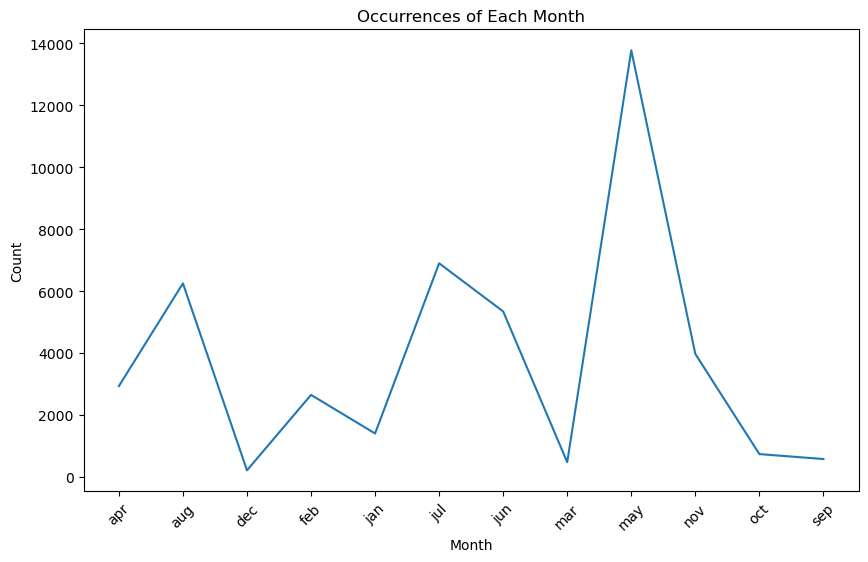

In [20]:
# Count the occurrences of each month
monthly_counts = df['month'].value_counts().sort_index()

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(monthly_counts.index, monthly_counts.values)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Occurrences of Each Month')
plt.xticks(rotation=45)
plt.show()

More customers were contacted in May and the least was in December.

#### Outcome of Previous Campaign

In [21]:
fig = px.bar(
    df["poutcome"].value_counts(normalize=True),
    title = "Outcome of Previous Campaign",
    height=500
)
fig.update_layout(yaxis_title = "Frequency")
fig.show()

3% success was recorded, 82% was unknown and 11% failure was recorded. 
The Campaign data collection system (analytics) is not effective at all.

#### Deposit

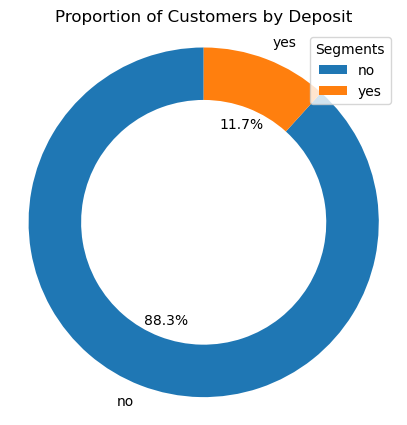

In [22]:
# Calculate the values for the pie chart
segment_counts = df['deposit'].value_counts()
segment_labels = segment_counts.index
segment_values = segment_counts.values

# Create the donut pie chart
plt.figure(figsize=(5, 5))
plt.pie(segment_values, labels=segment_labels, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
plt.axis('equal')
plt.title('Proportion of Customers by Deposit')
plt.legend(title='Segments', loc='upper right')
plt.show()

88% of the customers do not subscribe to term deposit while only 12% subscribed to term deposit

In [23]:
# Make a list of numerical features
num_features= ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

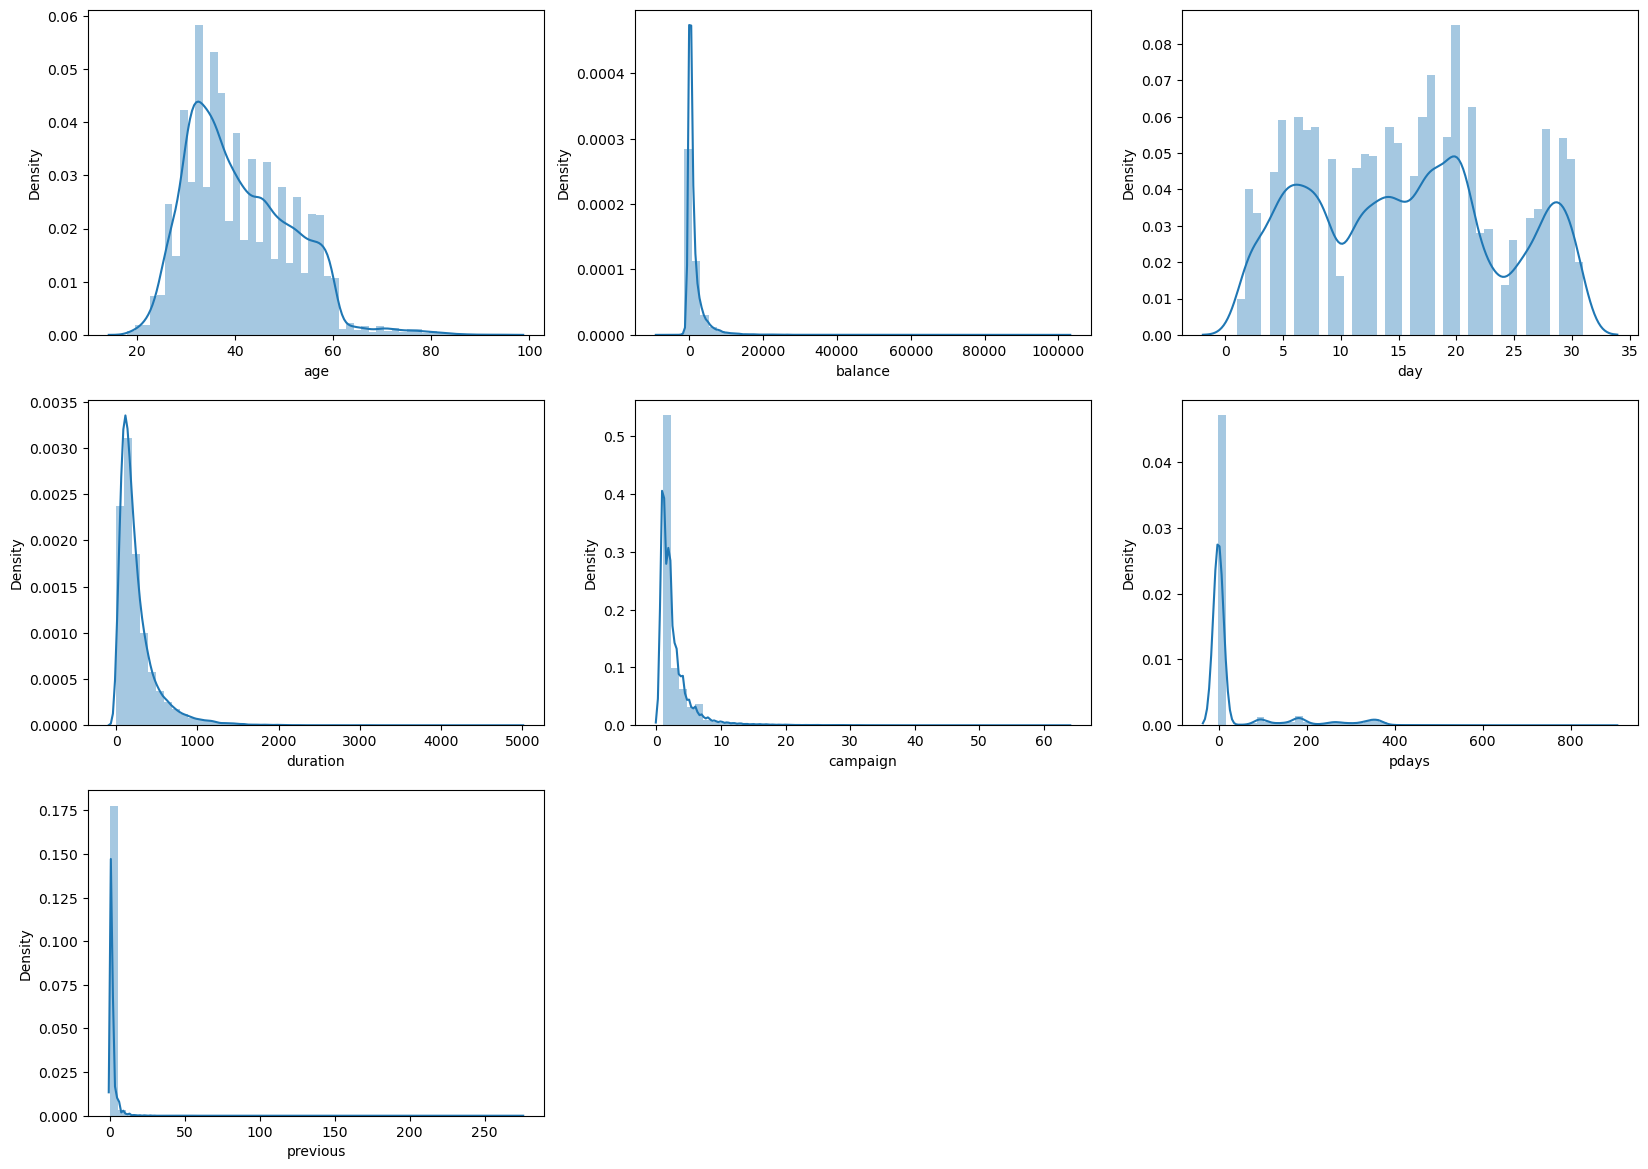

In [24]:
#plot a univariate distribution of numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for num_feature in num_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[num_feature])
    plt.xlabel(num_feature)
    plotnumber+=1
plt.show()

Age and days are distributed normally.
Others (i.e. balance, duration, compaign, pdays and previous) are heavily skewed towards left and they seem to be have some outliers.

In [25]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

#### Customers' Age

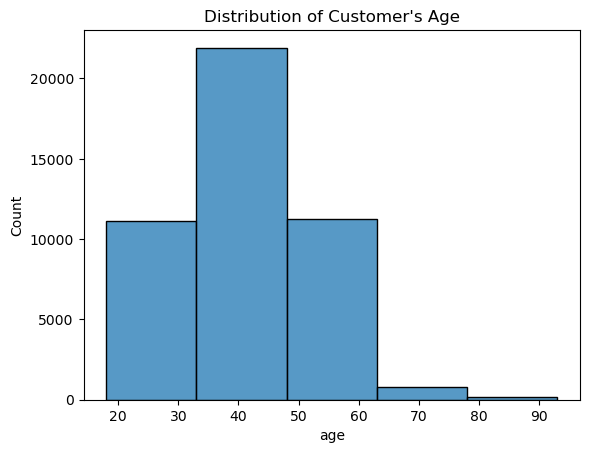

In [26]:
sns.histplot(data=df, x="age", bins = list(range(18, 100, 15)))
plt.title("Distribution of Customer's Age")
plt.savefig("Age.png");

It is seen that most of the customer's age distribution is within the range 32-48.

In [27]:
# Group Customer Age
#Creating a function
def age_group(x):
    if x <= 33:
        return '18-33 Youth'
    elif x <= 49:
        return '34-49 Adult'
    elif x <= 65:
        return '50-65 Old Adult'
    elif x <= 81:
        return '66-81 Elders'
    else:
        return '>=82 Aged'
    
#Apply function to the data
df['age_group'] = df['age'].apply(age_group)
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome deposit  \
0  unknown    5   may       261         1     -1         0  unknown      no   
1  unknown    5   may       151         1     -1         0  unknown      no   
2  unknown    5   may        76         1     -1         0  unknown      no   
3  unknown    5   may        92         1     -1         0  unknown      no   
4  unknown    5   may       198         1     -1         0  unknown      no   

         age_group  
0  50-65 Old Adult  
1      34-49 Adult  
2      18-33 Youth  
3      34-49 Adult  
4      18-33 Youth

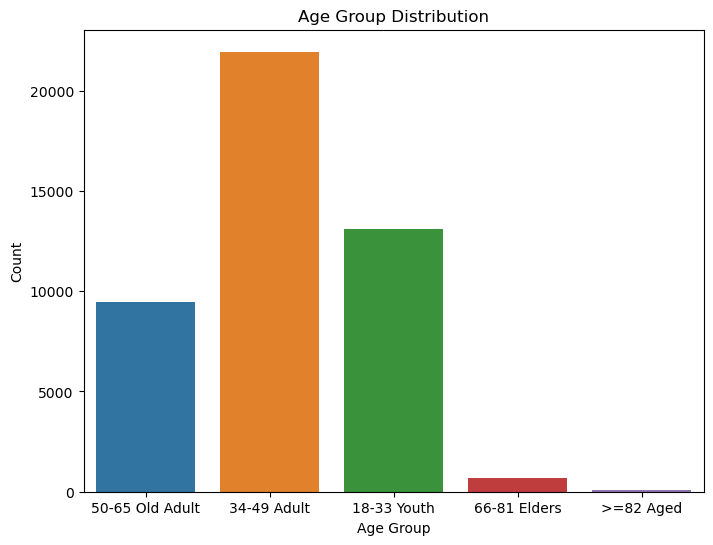

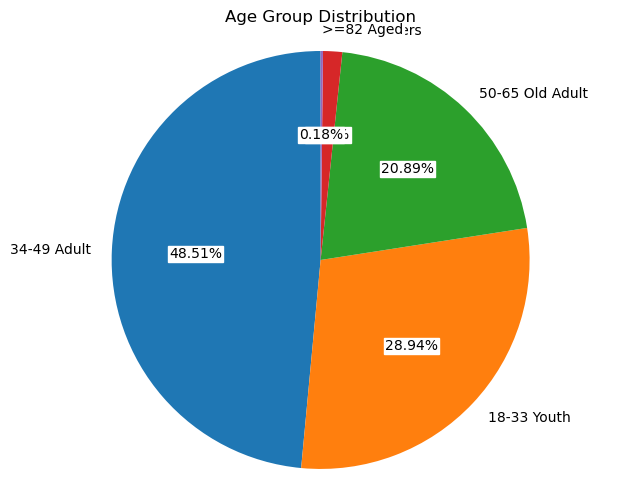

In [28]:
#age_group_counts = df["Age Group"].value_counts()
age_group_percentages = df["age_group"].value_counts(normalize=True) * 100

# Bar Plot for Age Group Counts
plt.figure(figsize=(8, 6))
sns.countplot(x="age_group", data=df)
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Age Group Distribution")
plt.show()

plt.figure(figsize=(8, 6))
labels = age_group_percentages.index
plt.pie(age_group_percentages, labels=labels, autopct='%1.2f%%', startangle=90, textprops={'bbox': {'facecolor': 'white', 'edgecolor': 'white', 'pad': 0.7}})
plt.axis('equal')
plt.title("Age Group Distribution")
plt.show()

Most of the customers fall in the Adult group (34-49 years old).

### Bivariate Analysis

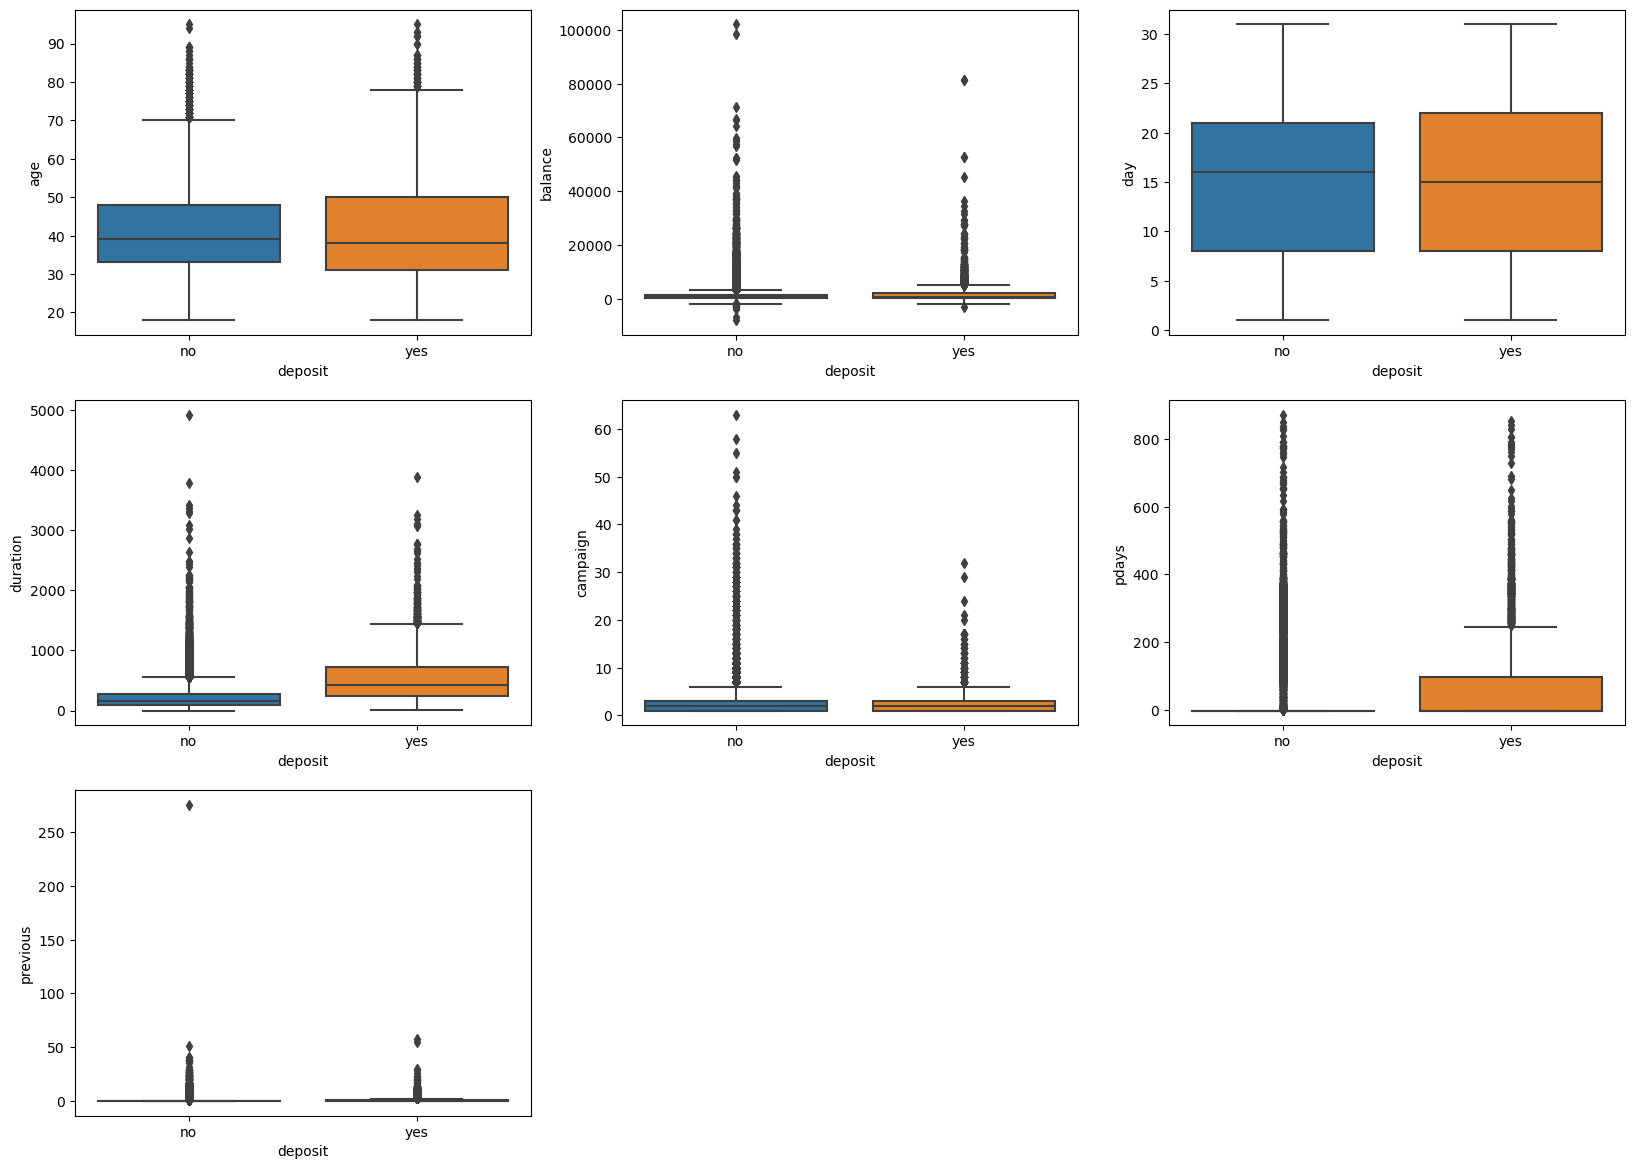

In [29]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for i in num_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="deposit", y= df[i], data=df)
    plt.xlabel("deposit")
    plotnumber+=1
plt.show()

Customers whose contact duration are longer showed interest on deposit. Meaning that duration of contact with customers should be increased for better result.

The age, balance, duration, compaign, pdays and previous data have some outliers.

In [30]:
# Make a list of categorical features
# Get the data types of each column
data_types = df.dtypes

# Filter the columns with object (categorical) data type
categorical_features = data_types[data_types == 'object'].index.tolist()

# Print the list of categorical features
print("Categorical Features:", categorical_features)


Categorical Features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit', 'age_group']


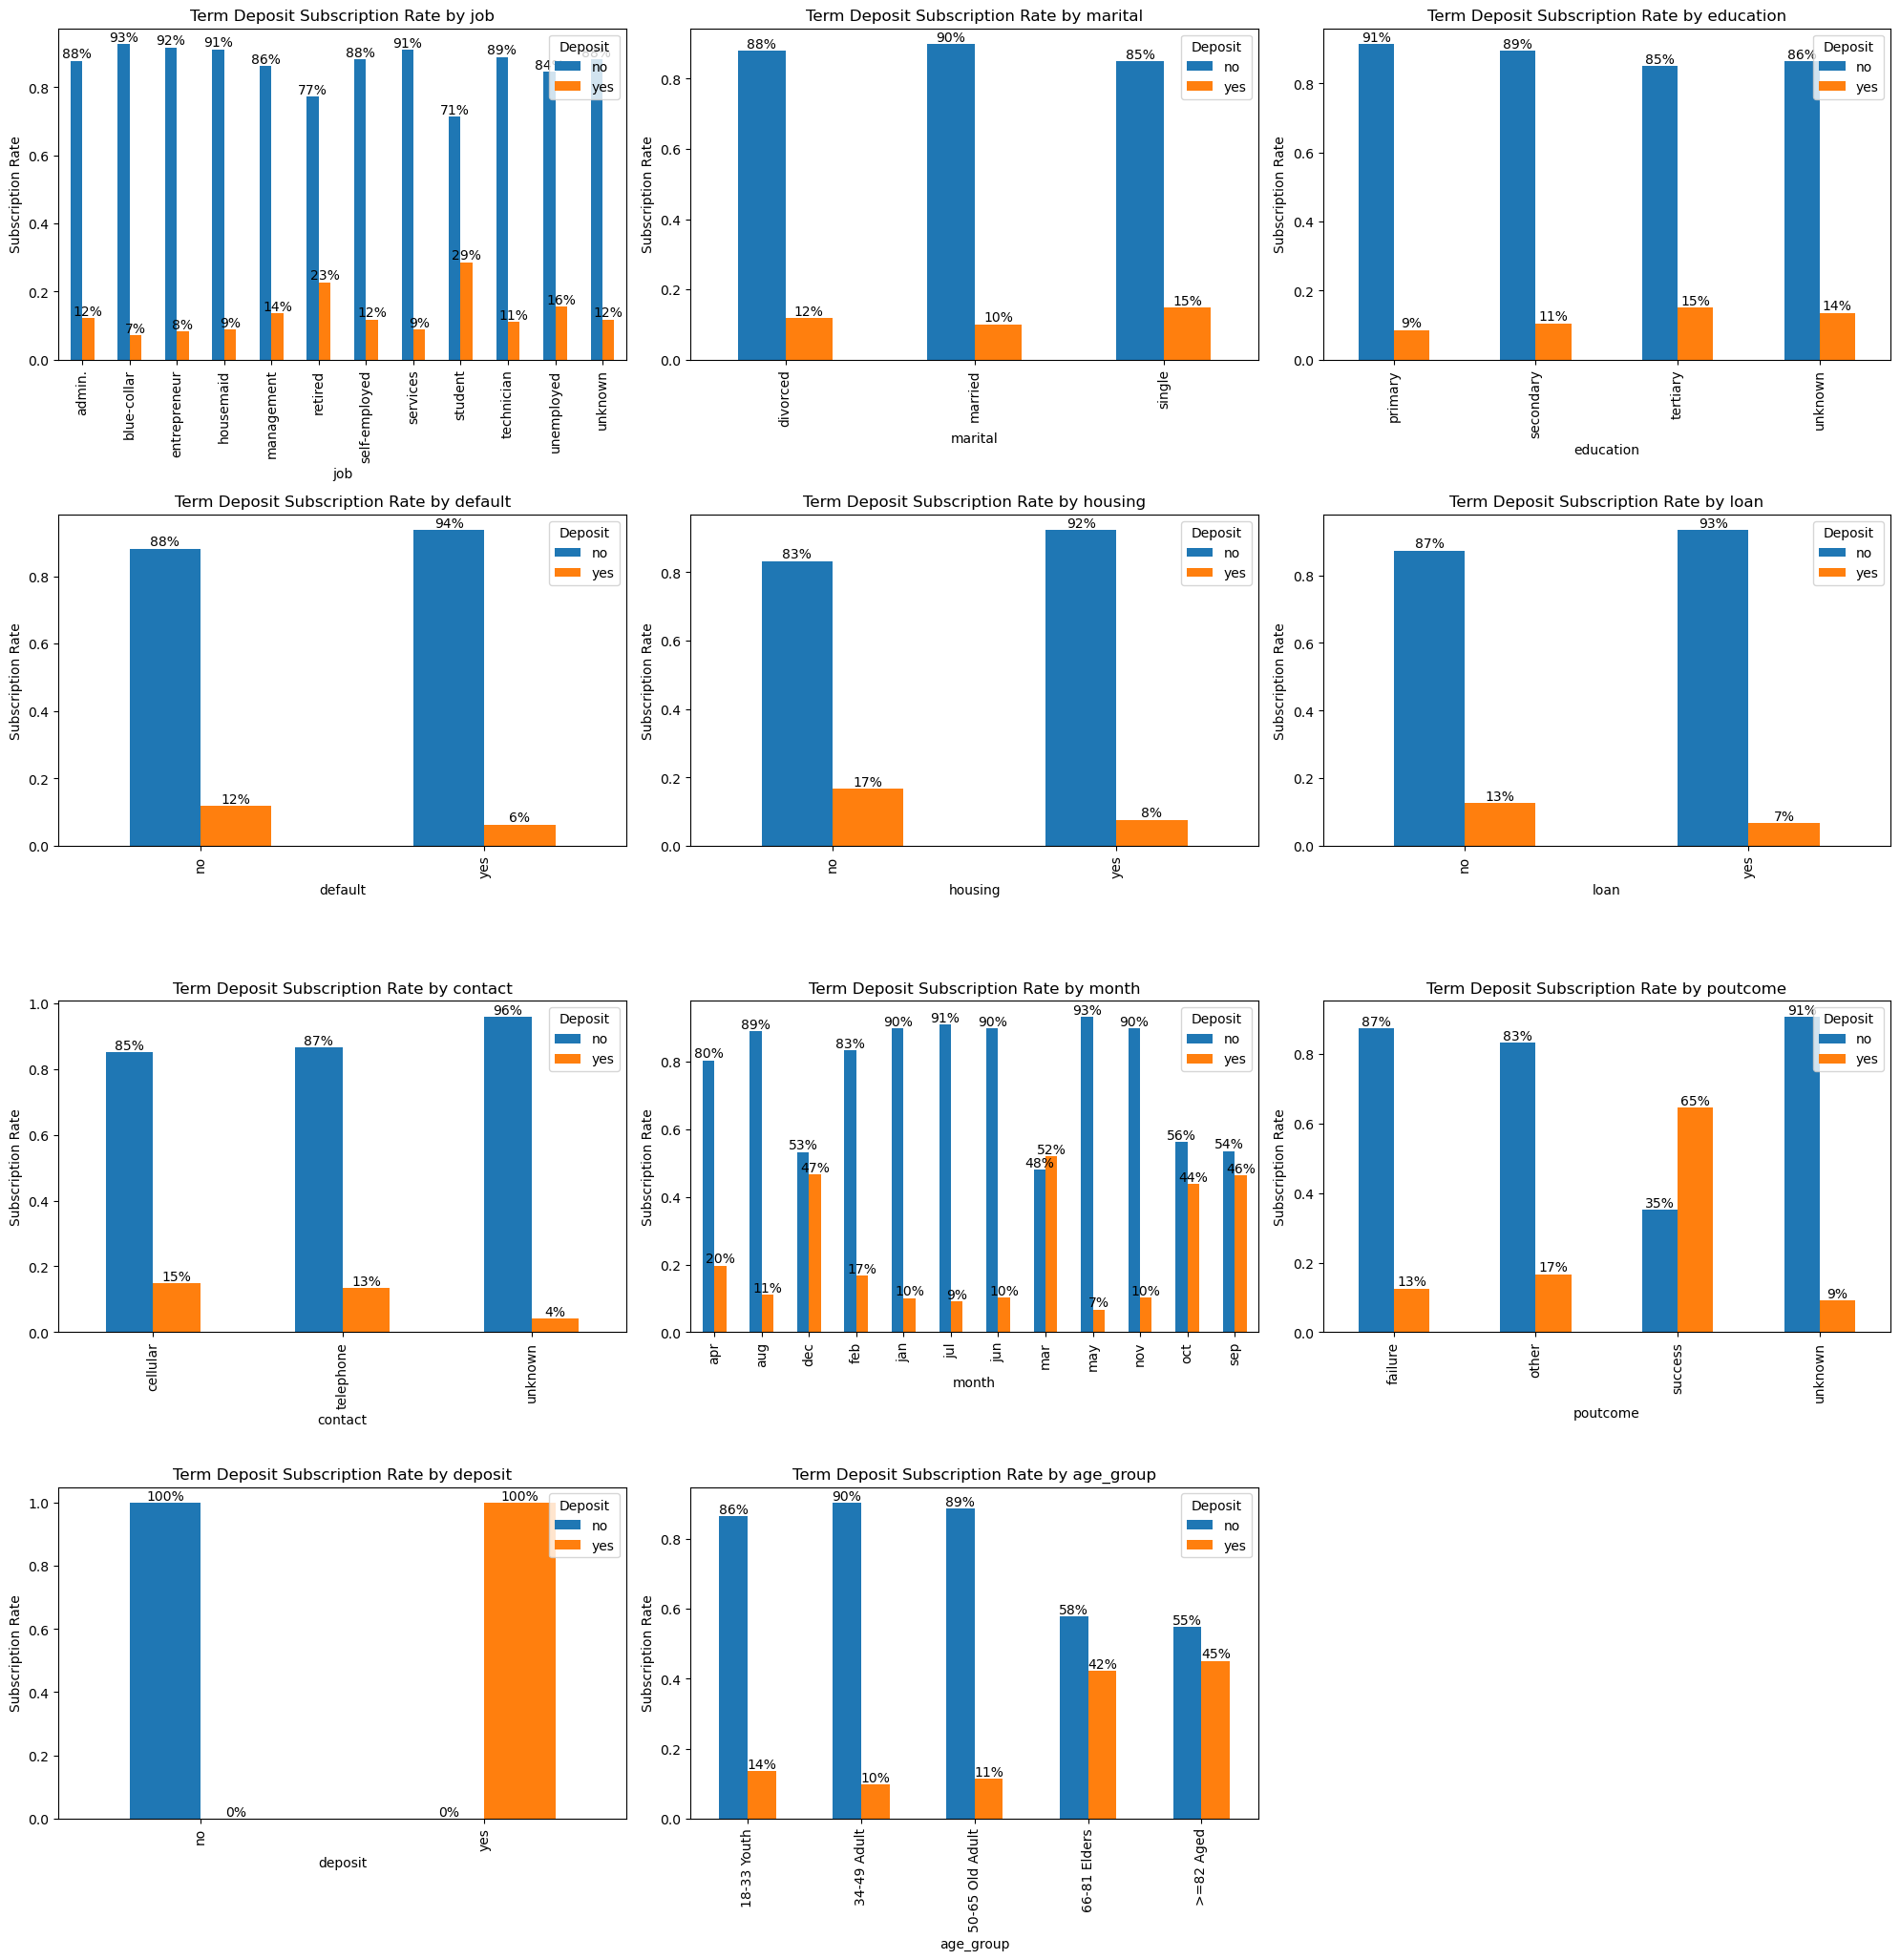

In [31]:
plt.figure(figsize=(20, 60))
plot_number = 1

for i in categorical_features:
    ax = plt.subplot(12, 3, plot_number)
    subscription_rate = df.groupby(i)["deposit"].value_counts(normalize=True).unstack()
    ax = subscription_rate.plot(kind="bar", ax=ax)
    plt.xlabel(i)
    plt.ylabel("Subscription Rate")
    plt.title(f"Term Deposit Subscription Rate by {i}")
    plt.legend(title="Deposit", loc="upper right")
    plt.xticks(rotation=90)
    
    # Labeling the bars with subscription rates
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.0%}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    
    plot_number += 1

plt.tight_layout()
plt.show()

The age group with the highest subscription of deposit (45%) is the aged group (>=82) followed by the Elders group with 42% and then the youth with 14%. The group that showed the least interest in deposit are the adult.

### Insights
Student showed most interest in term deposit followed by the retired customers then the unemployed.

The single customers showed the most interest in deposit followed by the divorced then the married.

Those with tertiary education showed high interest in deposit.

Customers with housing loan have less interest in term deposit.

Those without default showed more interest in term deposit than those with default.

Those without other loans showed more interest in term deposit than those with loans.

Contacted customers showed more interest in term deposit.

Customers showed high interest to term deposit in month of March, September, October and December eventhough in the month of May, Nexus bank recorded the largest number of customers.

Successful previous marketing produced high chance of customers subscribing to term deposit.


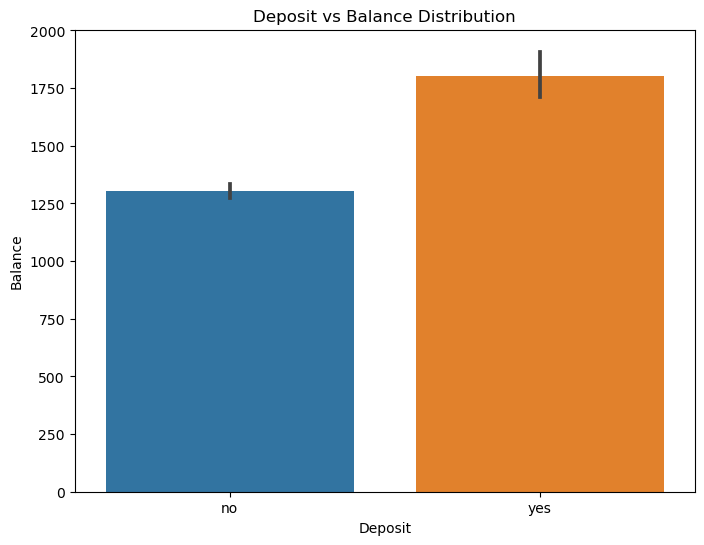

In [32]:
# Bar Plot for Deposit vs Balance Distribution
plt.figure(figsize=(8, 6))
sns.barplot(x="deposit", y='balance', data=df)
plt.xlabel("Deposit")
plt.ylabel("Balance")
plt.title("Deposit vs Balance Distribution")
plt.show()

The higher the account balance, the more interest shown by customers to deposit.

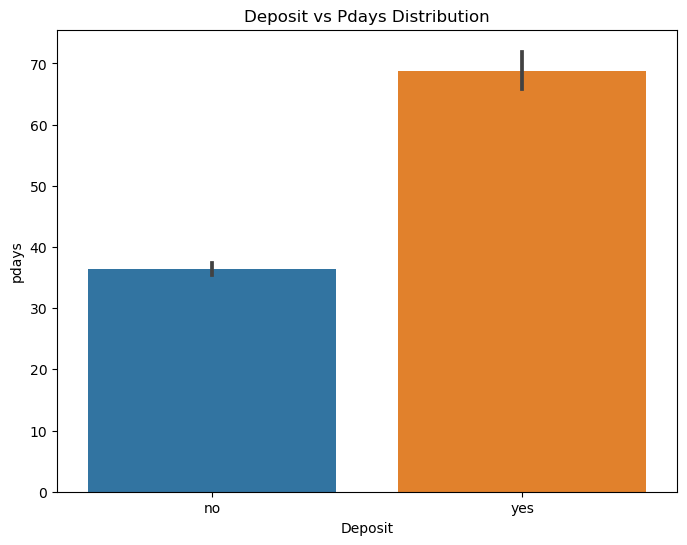

In [33]:
# Bar Plot for Deposit vs Balance Distribution
plt.figure(figsize=(8, 6))
sns.barplot(x="deposit", y='pdays', data=df)
plt.xlabel("Deposit")
plt.ylabel("pdays")
plt.title("Deposit vs Pdays Distribution")
plt.show()

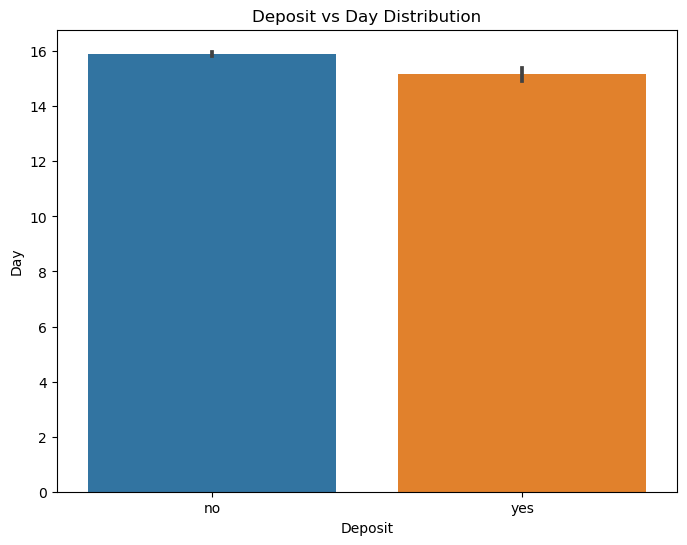

In [34]:
# Bar Plot for Deposit vs Balance Distribution
plt.figure(figsize=(8, 6))
sns.barplot(x="deposit", y='day', data=df)
plt.xlabel("Deposit")
plt.ylabel("Day")
plt.title("Deposit vs Day Distribution")
plt.show()


### Recommendation
Marketing campaigns should be encouraged in the month of March, September, October and December, targeting:
- The students in tertiary institutions (Age 18-30 years), the retired and the unemployed (Age 66years & above)
- Customers without loans and default 
because these set of people tend to save more.

More contact duration of at least 500 seconds (which the the median value of the duration of the last contact with those that subscribed to term deposit) should be spent while following up with the customers. 

To attract the Adult and the older adult customer groups, attractive benefits like high deposit commission can be offered by Nexus bank because these set of people tend to spend more and their population is about 62% of the entire customer base.

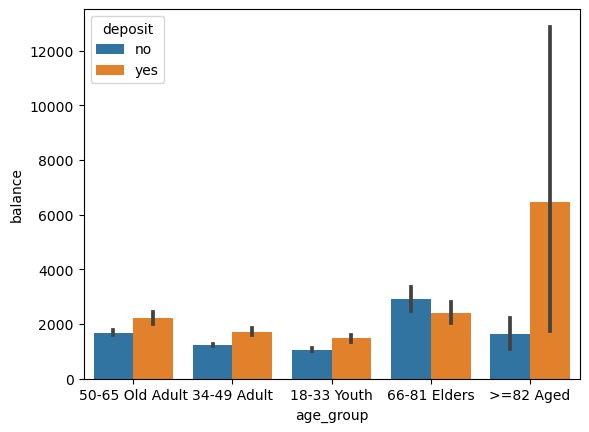

In [35]:
sns.barplot(data=df, x='age_group', y= 'balance', hue= 'deposit');

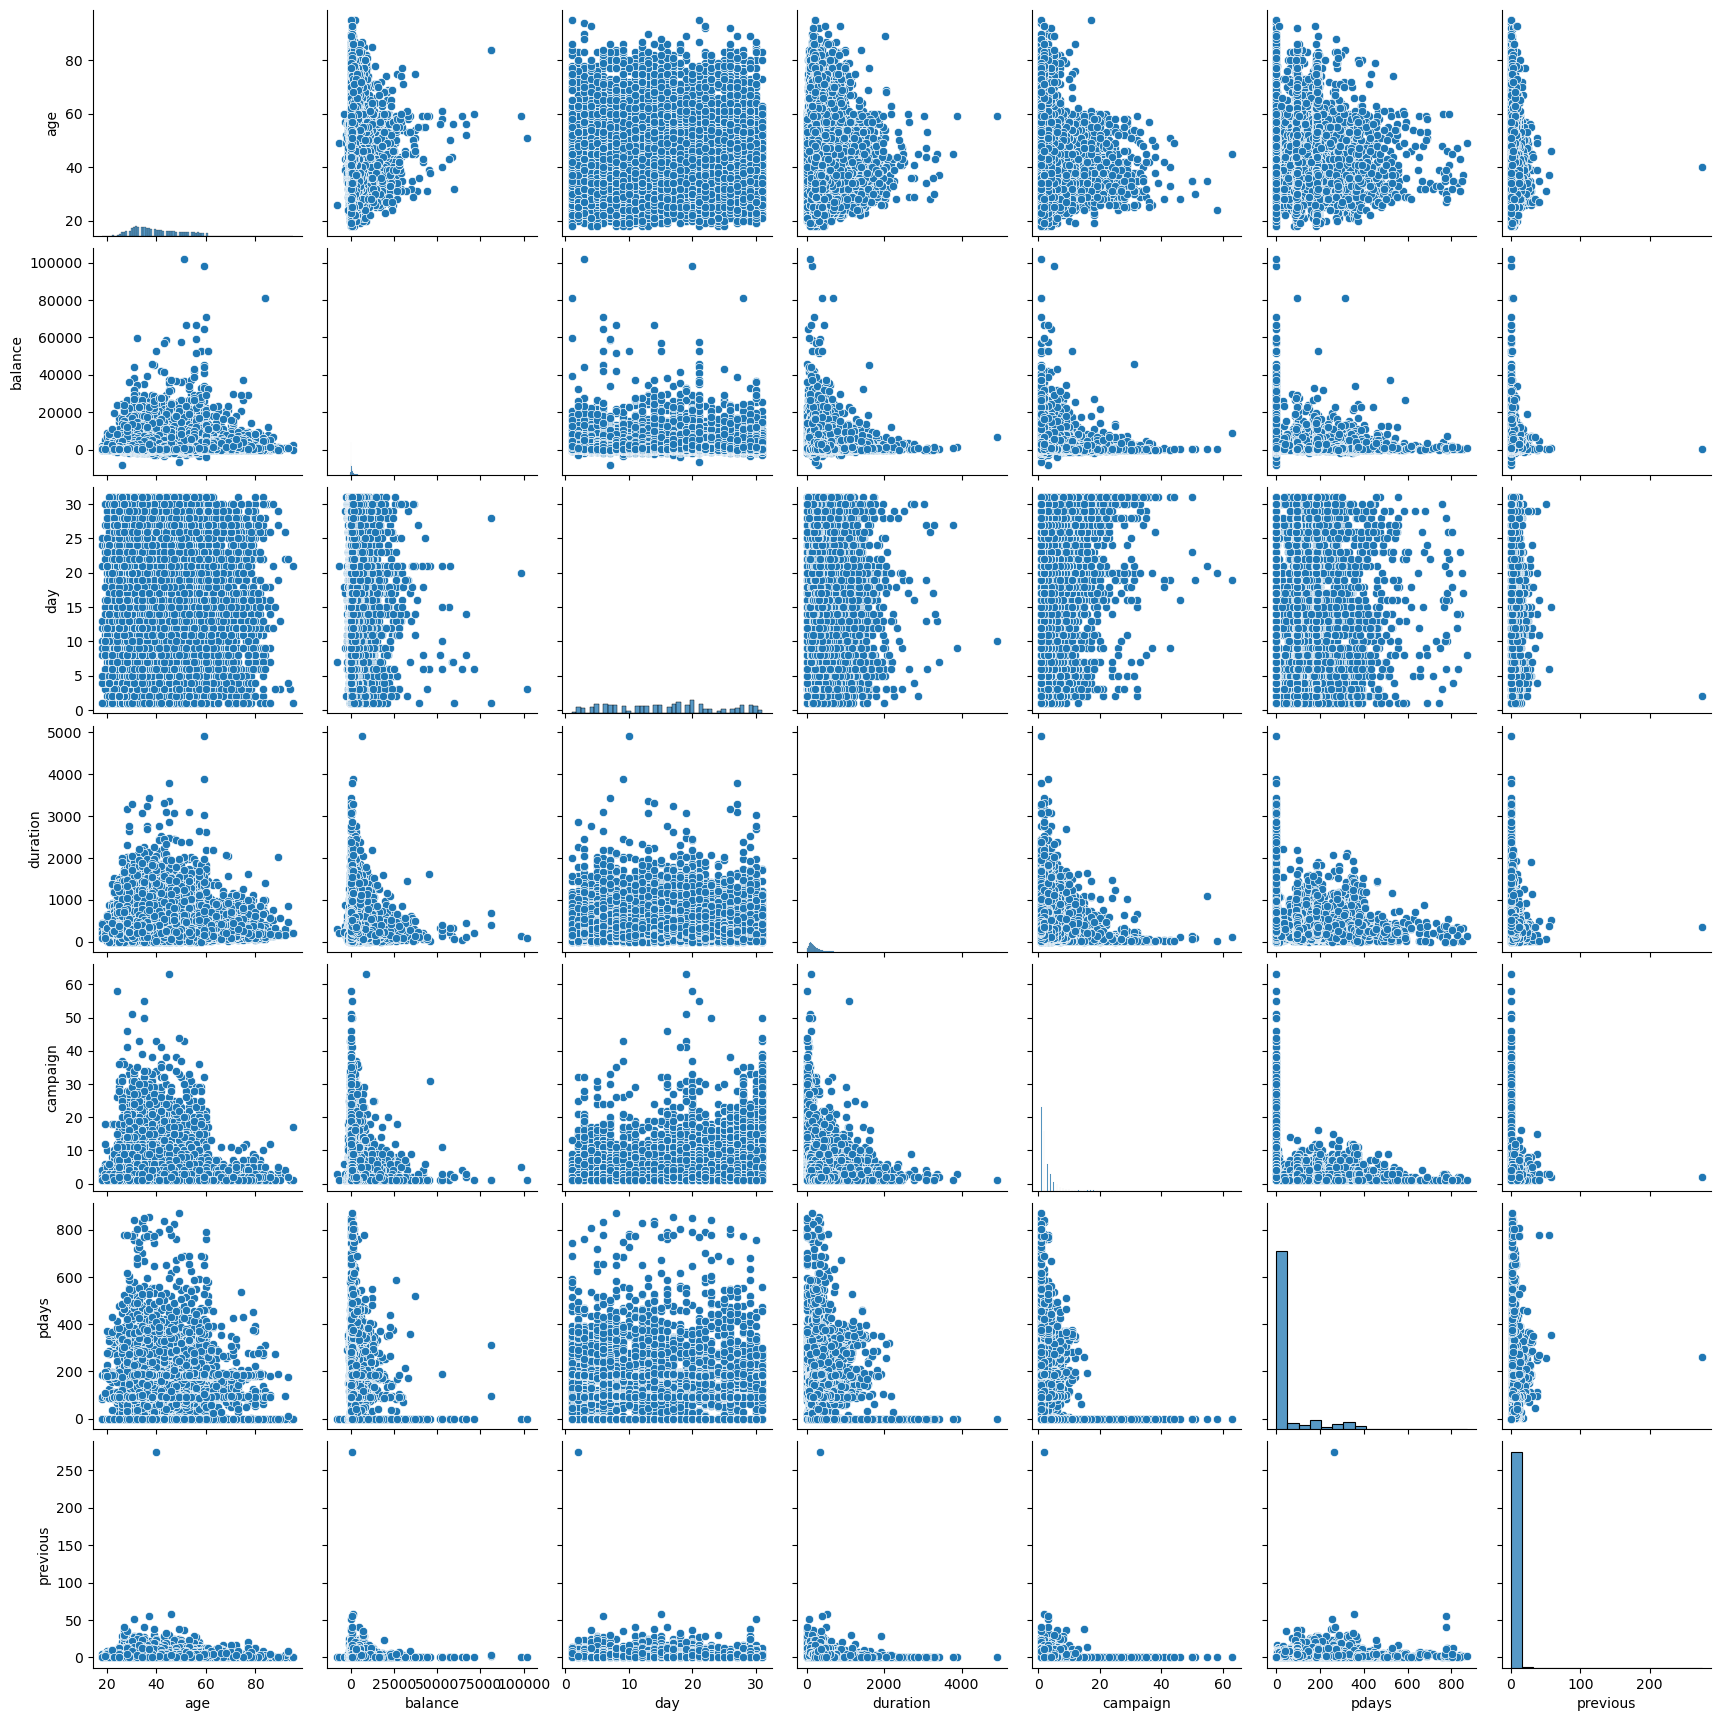

In [36]:
sns.pairplot(df)

<Figure size 2000x800 with 0 Axes>

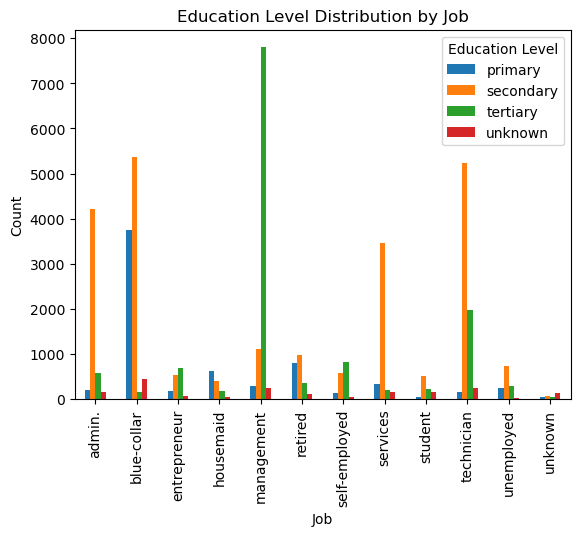

In [37]:
education_job_counts = df.groupby("job")["education"].value_counts().unstack()

# Stacked Bar Plot for Education Level Distribution by Job
plt.figure(figsize=(20, 8))
education_job_counts.plot(kind="bar")
plt.xlabel("Job")
plt.ylabel("Count")
plt.title("Education Level Distribution by Job")
plt.legend(title="Education Level", loc="upper right")
plt.xticks(rotation=90)
plt.show()

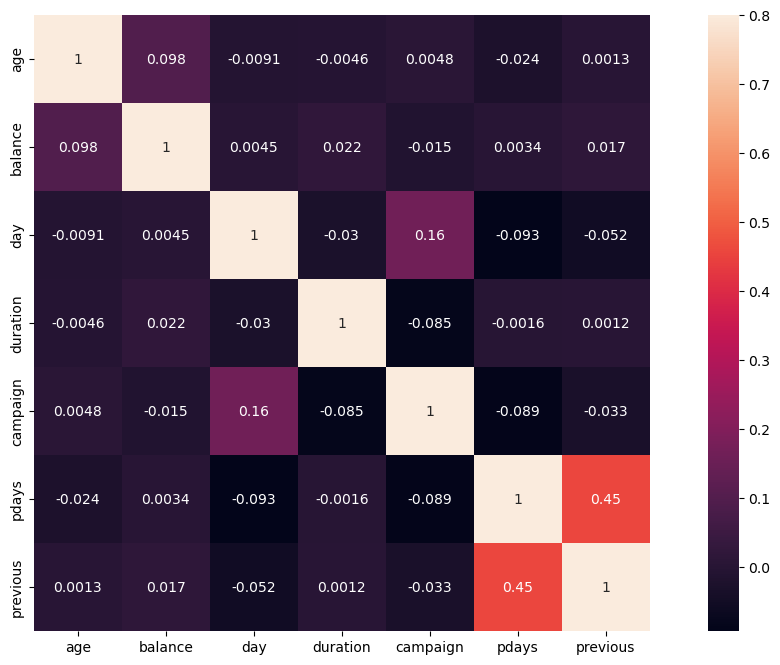

In [38]:
a=df.corr()
plt.figure(figsize= (15,8))
sns.heatmap(a, vmax=.8, square= True, annot= True);

There are no strong correlation between the numerical variables.

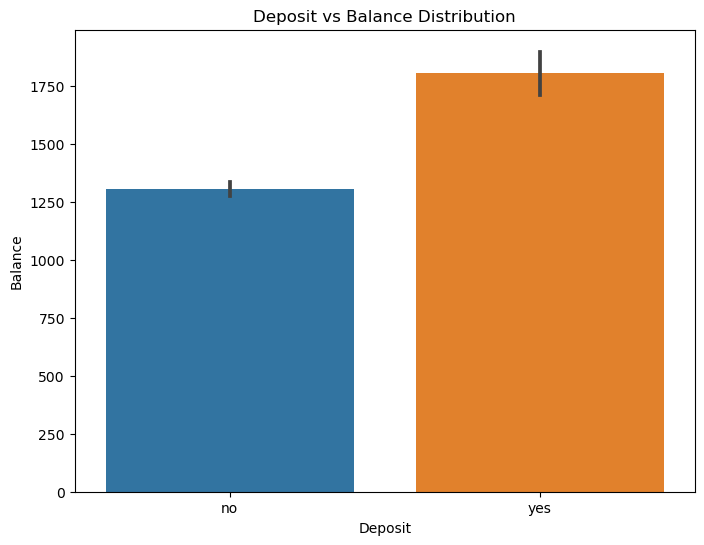

In [39]:
# Bar Plot showing the Relationship between Deposit and Balance 
plt.figure(figsize=(8, 6))
sns.barplot(x="deposit", y='balance', data=df)
plt.xlabel("Deposit")
plt.ylabel("Balance")
plt.title("Deposit vs Balance Distribution")
plt.show()

Customers with higher account balance showed more interest in term deposit.

In [40]:
# Duplicating the data
df1=df.copy()

In [41]:
df1.shape

(45211, 18)

In [42]:
df1.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome deposit  \
0  unknown    5   may       261         1     -1         0  unknown      no   
1  unknown    5   may       151         1     -1         0  unknown      no   
2  unknown    5   may        76         1     -1         0  unknown      no   
3  unknown    5   may        92         1     -1         0  unknown      no   
4  unknown    5   may       198         1     -1         0  unknown      no   

         age_group  
0  50-65 Old Adult  
1      34-49 Adult  
2      18-33 Youth  
3      34-49 Adult  
4      18-33 Youth

In [43]:
# Print the count of negative values in 'pdays' column
print("Number of rows with -1 as the 'pdays' value:", count_negative_pdays)

Number of rows with -1 as the 'pdays' value: 36954


In [44]:
# Drop 'pdays' column because the number of rows with negative value is large
df1.drop(['pdays'],axis=1, inplace=True)

In [45]:
# Encoding using Label encoding which converts categorical data into numerical data
from sklearn.preprocessing import LabelEncoder

# Label Encoding
encoder = LabelEncoder() # Method initialization

# Looping for columns except Survived
for c in df1.columns[1:]:
    if (df1[c].dtype== 'object'):
        df1[c] = encoder.fit_transform(df1[c])
    else:
        df1[c] = df1[c]
        
df1.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  month  duration  campaign  previous  poutcome  deposit  age_group  
0    5      8       261         1         0         3        0          2  
1    5      8       151         1         0         3        0          1  
2    5      8        76         1         0         3        0          0  
3    5      8        92         1         0         3        0          1  
4    5      8       198         1         0         3        0          0

## Customer Segmentation

In [46]:
### Building The Kmeans Model 

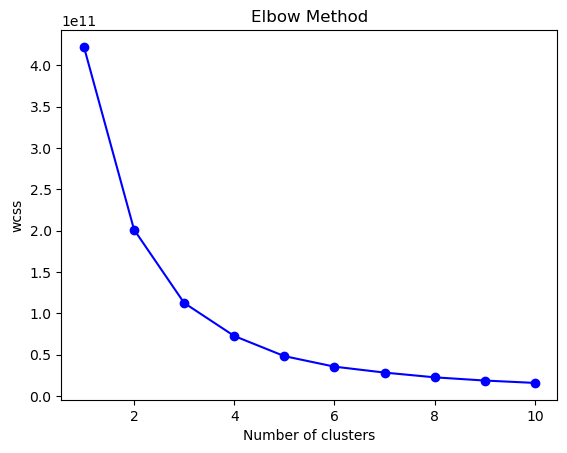

In [47]:
# Determine optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, color='blue', marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [48]:
# Fit K-Means clustering Model
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(df1)

# Add cluster labels to data
df1['Cluster'] = kmeans.labels_

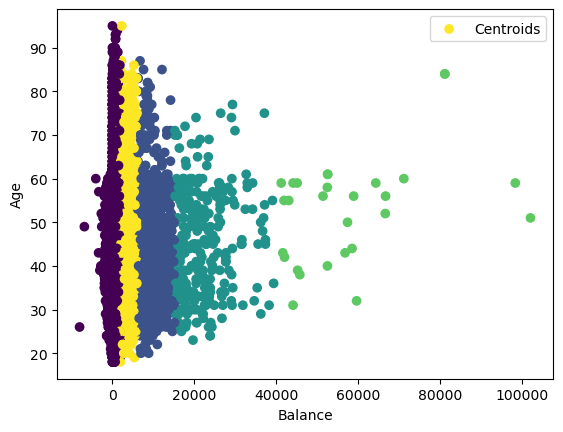

0.6900837818598294

In [50]:
# Visualize cluster results
plt.scatter(df1['balance'], df1['age'], c=df1['Cluster'], label='Centroids')
plt.xlabel('Balance')
plt.ylabel('Age')
plt.legend()
plt.show()

# Calculate silhouette score
from sklearn.metrics import silhouette_score

silhouette_score(df1, kmeans.labels_)

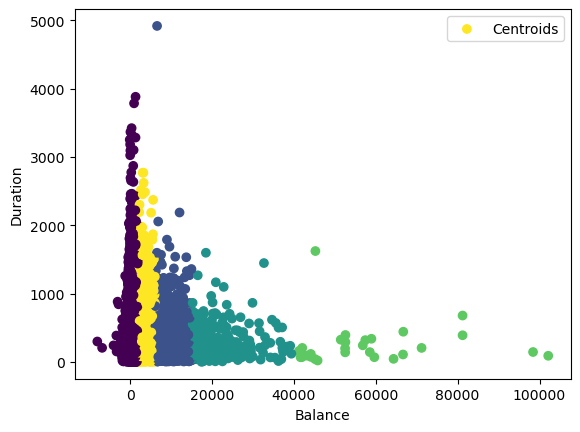

0.6900837818598294

In [51]:
# Visualize cluster results
plt.scatter(df1['balance'], df1['duration'], c=df1['Cluster'], label='Centroids')
plt.xlabel('Balance')
plt.ylabel('Duration')
plt.legend()
plt.show()

# Calculate silhouette score
from sklearn.metrics import silhouette_score

silhouette_score(df1, kmeans.labels_)

## Deposit Prediction

### Split the data

In [52]:
# Independent variables/features (drop the deposit column/target from the dataset)
X = df1.drop('deposit', axis=1)
X

age  job  marital  education  default  balance  housing  loan  contact  \
0       58    4        1          2        0     2143        1     0        2   
1       44    9        2          1        0       29        1     0        2   
2       33    2        1          1        0        2        1     1        2   
3       47    1        1          3        0     1506        1     0        2   
4       33   11        2          3        0        1        0     0        2   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
45206   51    9        1          2        0      825        0     0        0   
45207   71    5        0          0        0     1729        0     0        0   
45208   72    5        1          1        0     5715        0     0        0   
45209   57    1        1          1        0      668        0     0        1   
45210   37    2        1          1        0     2971        0     0        0   

       day  month  duration  campaign  previous  poutcome  age_group  Cluster  
0        5      8       261         1         0         3          2        4  
1        5      8       151         1         0         3          1        0  
2        5      8        76         1         0         3          0        0  
3        5      8        92         1         0         3          1        0  
4        5      8       198         1         0         3          0        0  
...    ...    ...       ...       ...       ...       ...        ...      ...  
45206   17      9       977         3         0         3          2        0  
45207   17      9       456         2         0         3          3        0  
45208   17      9      1127         5         3         2          3        4  
45209   17      9       508         4         0         3          2        0  
45210   17      9       361         2        11         1          1        4  

[45211 rows x 17 columns]

In [53]:
#select target variable
y = df1['deposit']
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: deposit, Length: 45211, dtype: int32

In [54]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(31647, 17)
(13564, 17)
(31647,)
(13564,)


### Feature Scaling

In [55]:
# Robust Scaler is preferred here as it is more robust to outliers

from sklearn.preprocessing import RobustScaler

X_train[list(X_train.select_dtypes(exclude=['object']).columns)] = RobustScaler().fit_transform(X_train[list(X_train.select_dtypes(exclude=['object']).columns)])
X_test[list(X_test.select_dtypes(exclude=['object']).columns)] = RobustScaler().fit_transform(X_test[list(X_test.select_dtypes(exclude=['object']).columns)])


# scaler = RobustScaler()

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

In [56]:
print(X_train.shape)
print(X_test.shape)

(31647, 17)
(13564, 17)


### Model Selection

In [57]:
from sklearn.model_selection import  cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn import tree

Classifier: Decision Tree

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11969
           1       0.45      0.46      0.46      1595

    accuracy                           0.87     13564
   macro avg       0.69      0.69      0.69     13564
weighted avg       0.87      0.87      0.87     13564



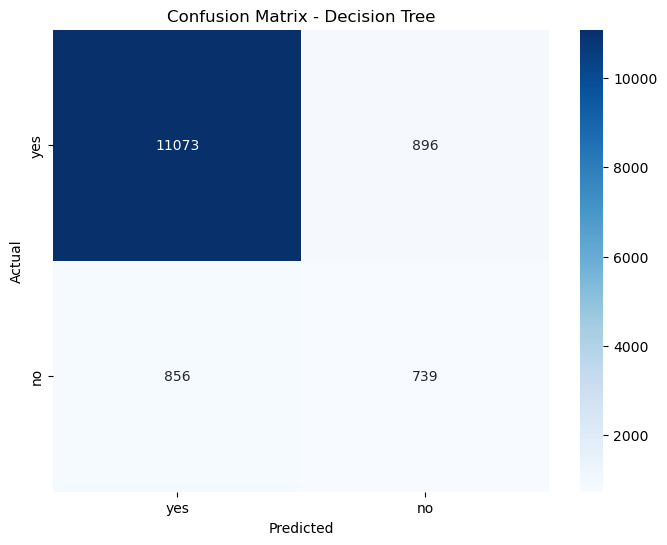





Classifier: K-Nearest Neighbors

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.96      0.94     11969
           1       0.55      0.33      0.41      1595

    accuracy                           0.89     13564
   macro avg       0.73      0.65      0.67     13564
weighted avg       0.87      0.89      0.88     13564



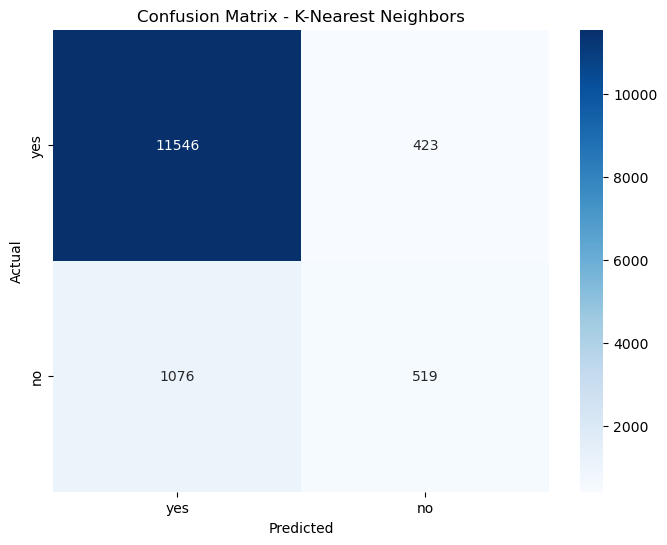





Classifier: Support Vector Machine

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11969
           1       0.62      0.24      0.35      1595

    accuracy                           0.89     13564
   macro avg       0.76      0.61      0.64     13564
weighted avg       0.87      0.89      0.87     13564



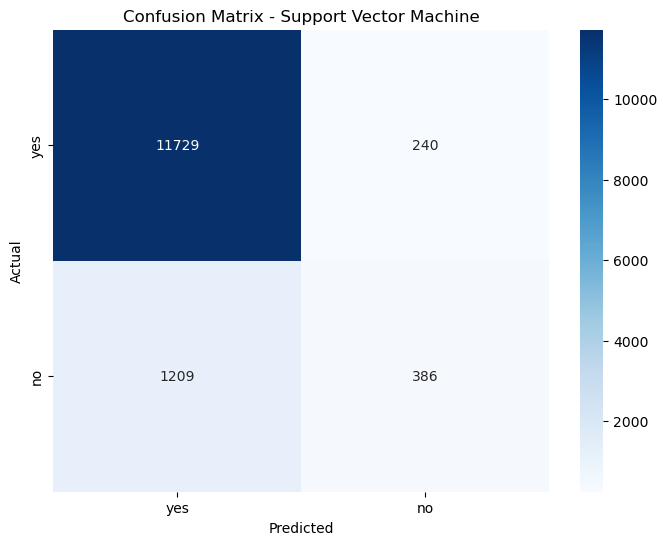





Classifier: Logistic Regression

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11969
           1       0.56      0.20      0.30      1595

    accuracy                           0.89     13564
   macro avg       0.73      0.59      0.62     13564
weighted avg       0.86      0.89      0.86     13564



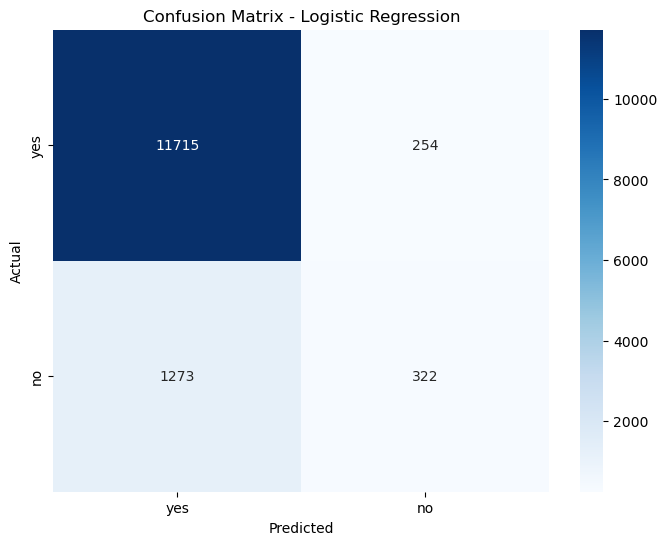





Classifier: Random Forest

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11969
           1       0.62      0.40      0.49      1595

    accuracy                           0.90     13564
   macro avg       0.77      0.68      0.72     13564
weighted avg       0.89      0.90      0.89     13564



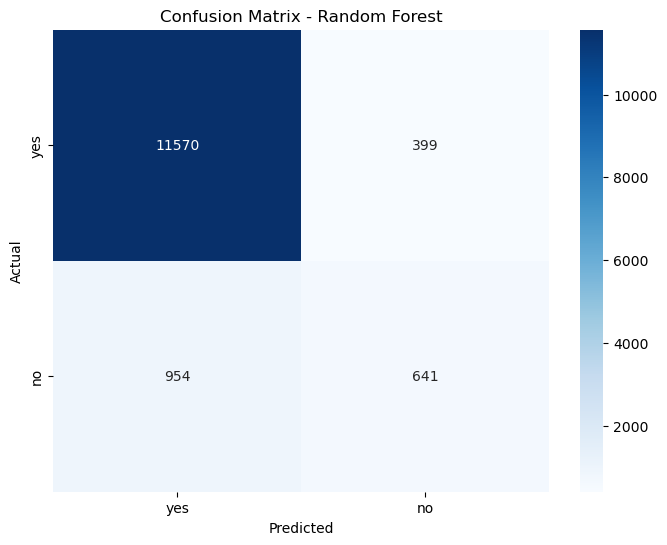





Classifier: Naive Bayes

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     11969
           1       0.41      0.46      0.43      1595

    accuracy                           0.86     13564
   macro avg       0.67      0.69      0.68     13564
weighted avg       0.87      0.86      0.86     13564



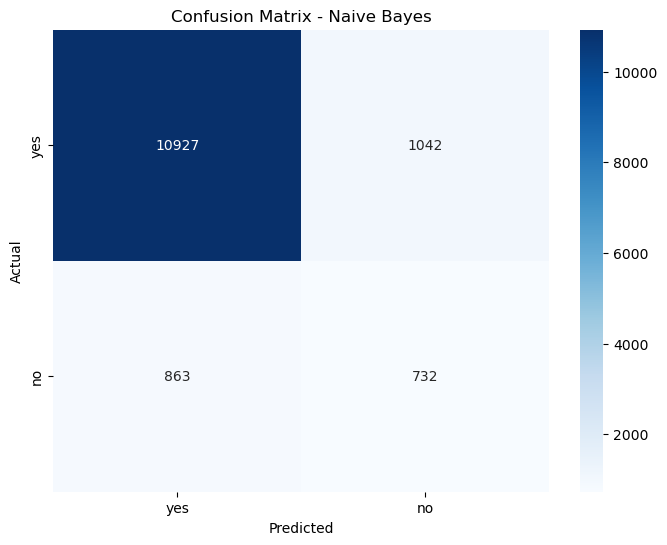





Classifier: Gradient Boosting Machine

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11969
           1       0.62      0.38      0.47      1595

    accuracy                           0.90     13564
   macro avg       0.77      0.67      0.71     13564
weighted avg       0.89      0.90      0.89     13564



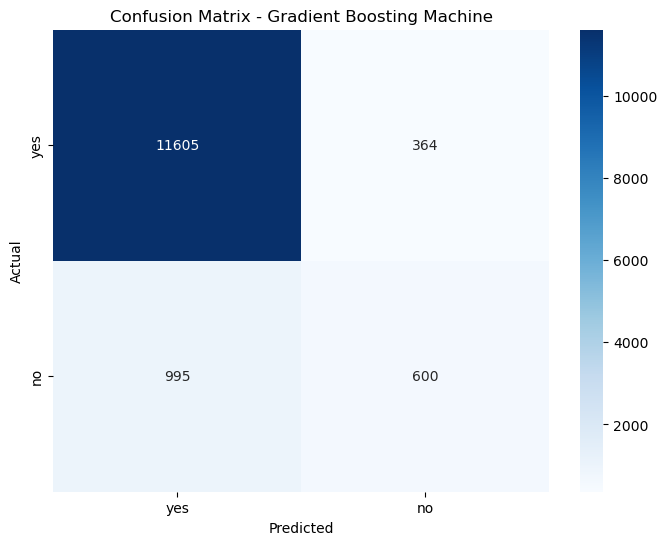





Classifier: XGBoost

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     11969
           1       0.61      0.47      0.53      1595

    accuracy                           0.90     13564
   macro avg       0.77      0.71      0.74     13564
weighted avg       0.89      0.90      0.90     13564



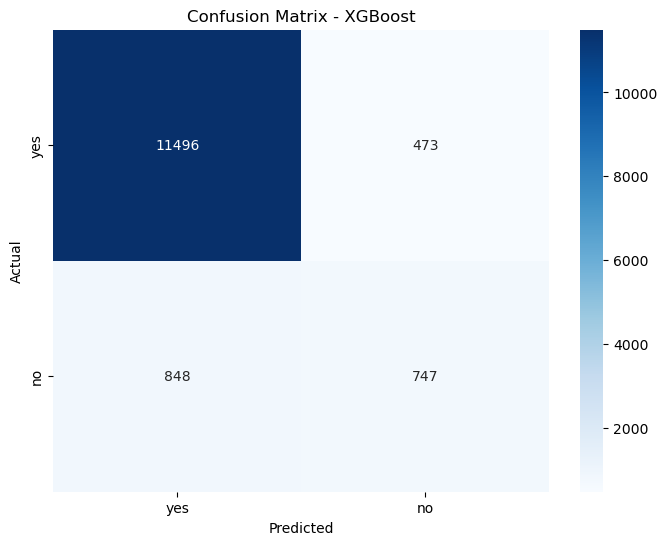

In [58]:
classifiers = [
    (DecisionTreeClassifier(), "Decision Tree"),
    (KNeighborsClassifier(), "K-Nearest Neighbors"),
    (SVC(), "Support Vector Machine"),
    (LogisticRegression(), "Logistic Regression"),
    (RandomForestClassifier(), "Random Forest"),
    (GaussianNB(), "Naive Bayes"),
    (GradientBoostingClassifier(), "Gradient Boosting Machine"),
    (xgb.XGBClassifier(), "XGBoost")
]

# Iterate through the list of classifiers
for classifier, name in classifiers:
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = classifier.predict(X_test)
    
    # Print the classifier's name
    print("Classifier:", name)
    
    # Print the classification report
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred))
    
  
    
    # Create Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    # Plotting the confusion matrix with colors
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['yes','no'], yticklabels=['yes','no'])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    # Add a separator for clarity
    
    print("="*100)
    print('\n\n\n')

In [59]:
# Display metrics in a dataframe
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])


for classifier, name in classifiers:
    y_pred = classifier.predict(X_test)  # Replace X_test with your test data
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    metrics_df = metrics_df.append({'Model': name, 'Accuracy': accuracy, 'Precision': precision,
                                    'Recall': recall, 'F1-Score': f1}, ignore_index=True)
    metrics_df = metrics_df.sort_values(by='F1-Score', ascending=False)

display(metrics_df)

Model  Accuracy  Precision    Recall  F1-Score
7                    XGBoost  0.902610   0.893790  0.902610  0.896874
0              Random Forest  0.900251   0.887669  0.900251  0.890876
1  Gradient Boosting Machine  0.899808   0.885916  0.899808  0.888742
2        K-Nearest Neighbors  0.889487   0.871973  0.889487  0.876732
3     Support Vector Machine  0.893173   0.872460  0.893173  0.871947
4              Decision Tree  0.870835   0.872239  0.870835  0.871526
5        Logistic Regression  0.887423   0.861658  0.887423  0.863301
6                Naive Bayes  0.859555   0.866340  0.859555  0.862757

From the table, the best model is XGBoost followed by Random forest, then Gradient boosting machine and so on because of the high accuracy, recall and F1-Score. 

In [60]:
# Important features
importances = classifier.feature_importances_

feature_names = X_train.columns  # Replace with the actual feature names or column labels
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

      Feature  Importance
14   poutcome    0.202899
8     contact    0.129561
6     housing    0.125320
11   duration    0.104579
10      month    0.072687
13   previous    0.070995
7        loan    0.062026
9         day    0.035285
0         age    0.032120
2     marital    0.028979
12   campaign    0.026761
3   education    0.026480
5     balance    0.023330
16    Cluster    0.021510
1         job    0.020280
4     default    0.017187
15  age_group    0.000000


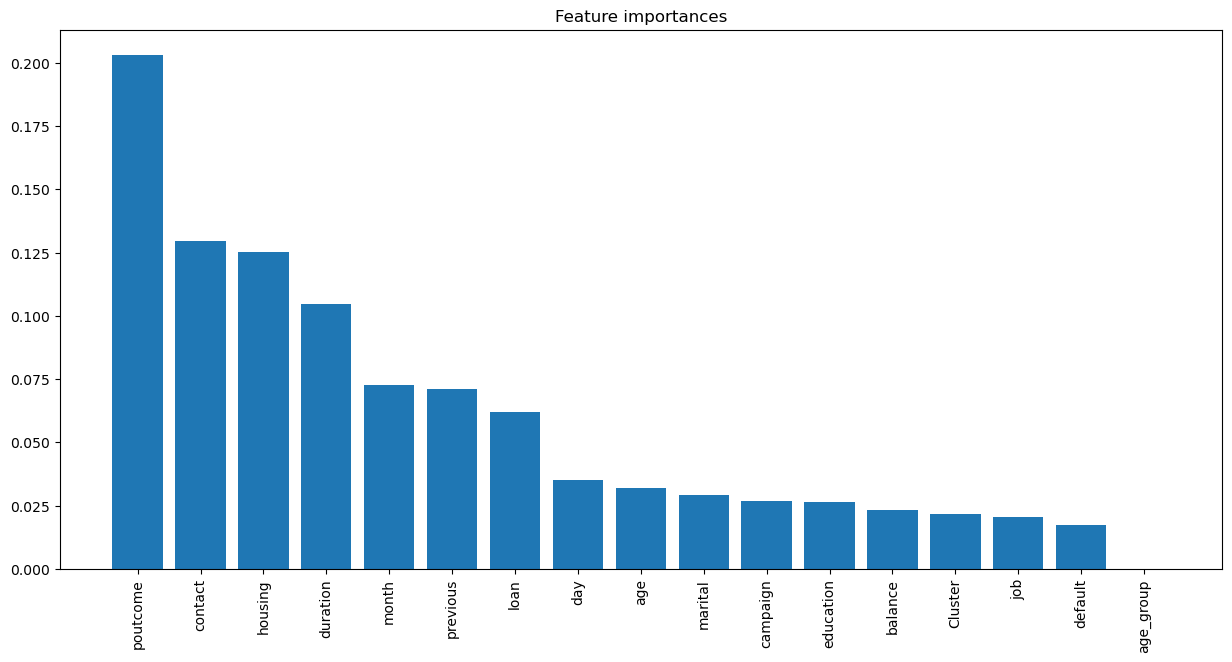

In [61]:
#plot feature importances
fig = plt.figure(figsize=(15,7))
x_pos = np.arange(0, len(importance_df))
plt.bar(x_pos, importance_df['Importance'])
plt.xticks(x_pos, importance_df['Feature'])
plt.xticks(rotation=90)
plt.title('Feature importances')

plt.show()